<h1><center>Regression models</center></h1>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# Importing the dataset

In [19]:
# Import processed dataset

df = pd.read_csv("C:\\Users\\Elena\\OneDrive - Universitatea Babeş-Bolyai\\AI UBB - Semester 4\\Fundamentals of Machine Learning\\Assignments\\assignment1\\processed_data.csv")

print("Dataset Overview:")
df.info()
df.head()

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Series_Title               1000 non-null   object 
 1   Released_Year              1000 non-null   float64
 2   Certificate                1000 non-null   int64  
 3   Runtime                    1000 non-null   float64
 4   IMDB_Rating                1000 non-null   float64
 5   Meta_score                 1000 non-null   float64
 6   Director                   1000 non-null   object 
 7   Star1                      1000 non-null   object 
 8   Star2                      1000 non-null   object 
 9   Star3                      1000 non-null   object 
 10  Star4                      1000 non-null   object 
 11  No_of_Votes                1000 non-null   float64
 12  Gross                      1000 non-null   float64
 13  Drama_Adventure_Animation  1000

,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Drama_Adventure_Animation,Thriller_Mystery_Crime,Biography_History_Romance,Family_SciFi_Fantasy
0,The Shawshank Redemption,0.721925,1,0.758816,1.0,0.611650,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2.371449,-0.430865,0.685197,-0.224102,-0.013177,-0.096401
1,The Godfather,0.486631,1,2.028963,1.0,1.000000,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,2.371449,1.038904,1.051675,0.594188,-0.183710,0.579333
2,The Dark Knight,0.871658,5,1.143709,1.0,0.689320,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2.371449,2.439949,0.324705,1.323938,0.465101,0.033302
3,The Godfather: Part II,0.508021,1,2.529323,1.0,0.805825,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,2.371449,-0.031687,1.051675,0.594188,-0.183710,0.579333
4,12 Angry Men,0.326203,6,-1.011691,1.0,0.922330,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,1.731460,-0.761437,1.051675,0.594188,-0.183710,0.579333


# Selecting the Target Variable or Dependent variable
- Choose a numerical column from the dataset that you believe is the best to predict based on available features.
- Justify your selection using data analysis and visualization.
- Show correlations between this target variable and other potential features

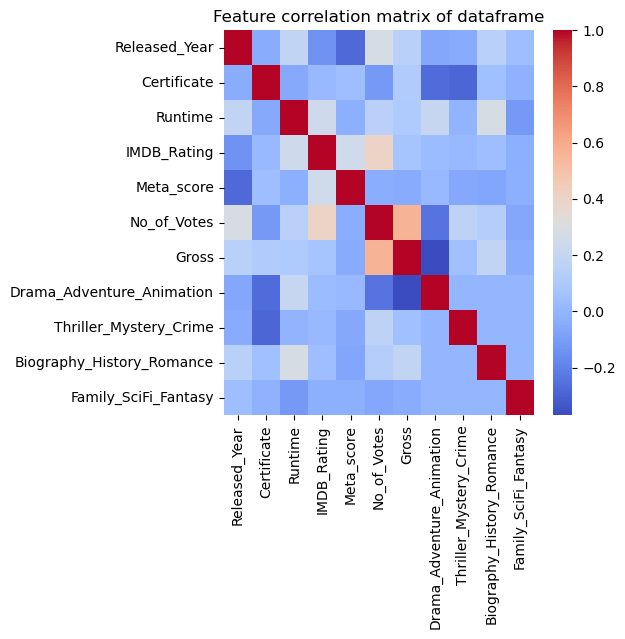

In [20]:
# Heatmap of features

plt.figure(figsize=(5, 5))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), cmap = "coolwarm", fmt = ".2f")
plt.title("Feature correlation matrix of dataframe")
plt.show()

By analysing the feature correlation matrix, I choose **No_of_Votes** as the dependent variable, since it seems to be moderately correlated to multiple other features of the dataset.  

# Feature Selection & Engineering
- Use statistical methods (correlation matrix, feature importance) to select relevant features.
- Apply any additional transformations, if necessary, to improve predictive performance.
- Clearly document your choices and explain why specific features are included or excluded.

I will analise the correlation between the No_of_Votes and the following variables:
- Released_Year (slight positive correlation)
- IMDB_Rating (moderate positive correlation)
- Gross (moderate to high positive correlation
- Drama_Adventure_Animation (slight negative correlation)

In [21]:
# Pearson correlation between No_of_Votes and other variables

print("Pearson correlation coefficients of No_of_Votes: ")

corr, p_value = pearsonr(df['No_of_Votes'], df['Released_Year'])
print(f"Released_Year: {corr:.2f}, P-value: {p_value:.4f}")

corr, p_value = pearsonr(df['No_of_Votes'], df['IMDB_Rating'])
print(f"IMDB_Rating: {corr:.2f}, P-value: {p_value:.4f}")

corr, p_value = pearsonr(df['No_of_Votes'], df['Gross'])
print(f"Gross: {corr:.2f}, P-value: {p_value:.4f}")

corr, p_value = pearsonr(df['No_of_Votes'], df['Drama_Adventure_Animation'])
print(f"Drama_Adventure_Animation: {corr:.2f}, P-value: {p_value:.4f}")

Pearson correlation coefficients of No_of_Votes: 
Released_Year: 0.28, P-value: 0.0000
IMDB_Rating: 0.40, P-value: 0.0000
Gross: 0.56, P-value: 0.0000
Drama_Adventure_Animation: -0.24, P-value: 0.0000


In [22]:
# Spearman correlation between No_of_Votes and other variables

print("Spearman correlation coefficients of No_of_Votes: ")

corr, p_value = spearmanr(df['No_of_Votes'], df['Released_Year'])
print(f"Released_Year: {corr:.2f}, P-value: {p_value:.4f}")

corr, p_value = spearmanr(df['No_of_Votes'], df['IMDB_Rating'])
print(f"IMDB_Rating: {corr:.2f}, P-value: {p_value:.4f}")

corr, p_value = spearmanr(df['No_of_Votes'], df['Gross'])
print(f"Gross: {corr:.2f}, P-value: {p_value:.4f}")

corr, p_value = spearmanr(df['No_of_Votes'], df['Drama_Adventure_Animation'])
print(f"Drama_Adventure_Animation: {corr:.2f}, P-value: {p_value:.4f}")

Spearman correlation coefficients of No_of_Votes: 
Released_Year: 0.25, P-value: 0.0000
IMDB_Rating: 0.21, P-value: 0.0000
Gross: 0.51, P-value: 0.0000
Drama_Adventure_Animation: -0.17, P-value: 0.0000


The numerical findings confirm my intuition. By analysing the linear relationships (Pearson), as well as the monotonic relationships (Spearman), I found similar correlation coefficients to what I initially saw in the heatmap.  
   
Moreover, all the p-values are effectively 0.0000, which means the relationships are highly unlikely to be due to random chance.
  
This means that the 4 features selected can be used for training Regression Models.   

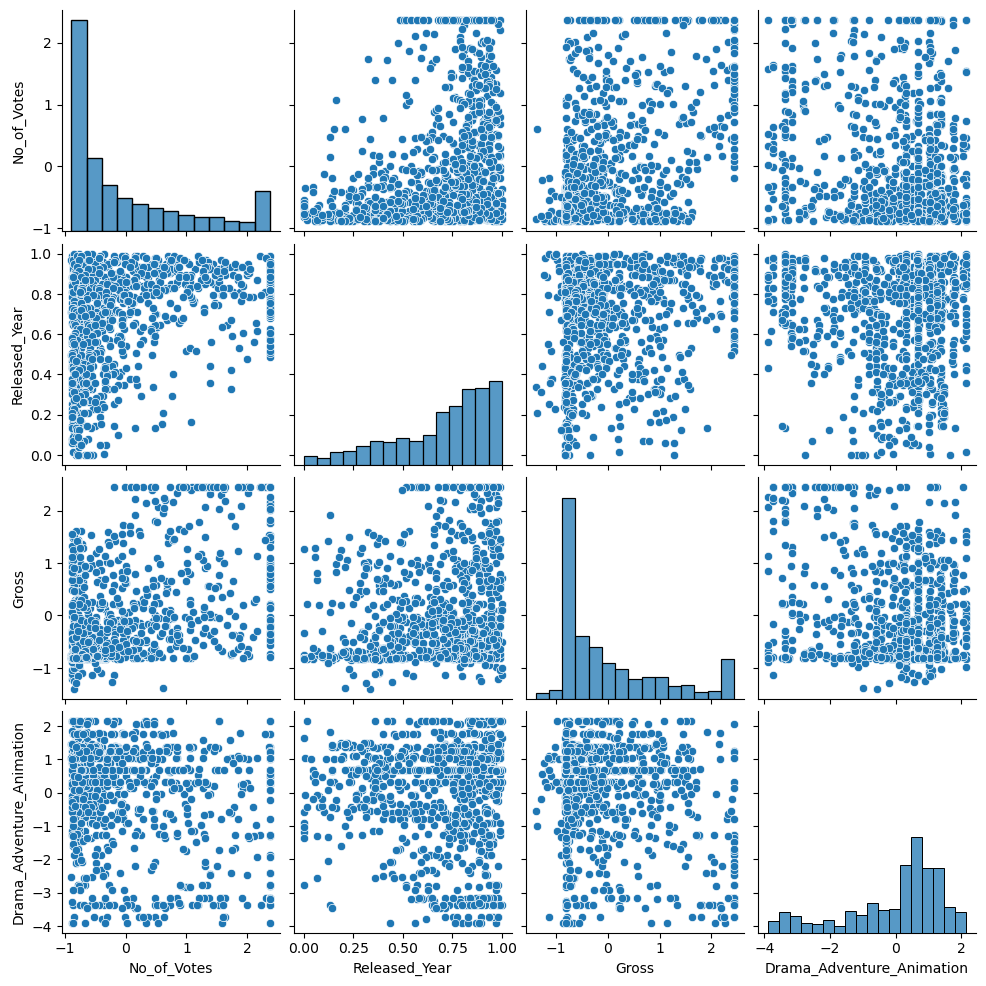

In [23]:
# Pairplot of No_of_Votes, Released_Year, Gross and Drama_Adventure_Animation

sns.pairplot(df[['No_of_Votes','Released_Year', 'Gross', 'Drama_Adventure_Animation']])
plt.show()

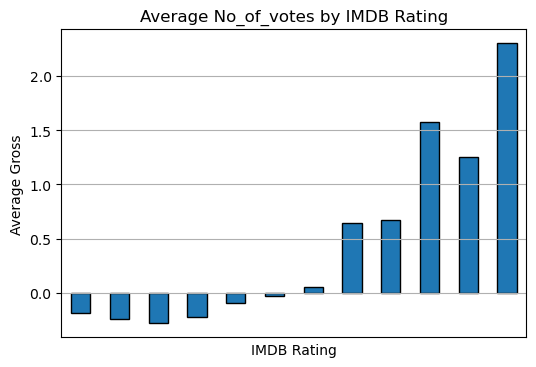

In [24]:
# Plot the average No_of_Votes by IMDB_Rating

avg_gross = df.groupby('IMDB_Rating')['No_of_Votes'].mean()
avg_gross = avg_gross.sort_index()

plt.figure(figsize=(6, 4))
avg_gross.plot(kind='bar', edgecolor='black')

plt.title("Average No_of_votes by IMDB Rating")
plt.xlabel("IMDB Rating")
plt.ylabel("Average Gross")
plt.xticks([], [])
plt.grid(axis='y')

plt.show()

The visualisations help understand the distributions of the related features, as well as the visual correlation between them and No_of_Votes.

Before we train regression, we have to make sure all our features are normalized.

In [25]:
# Normalize features and target

scaler_f = StandardScaler()
f = scaler_f.fit_transform(df[['Released_Year', 'IMDB_Rating', 'Gross', 'Drama_Adventure_Animation']].values)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(df[['No_of_Votes']].values).flatten()

# Training Regression Models
Train and evaluate five different regression models:
1. Linear Regression
2. Decision Tree Regression
3. Random Forest Regression
  
For each model:
- Train it using the selected features.
- Optimize hyperparameters where applicable.
- Evaluate its performance using relevant metrics (e.g., RMSE, MAE, R-squared).
- Compare model performances using a table and visualization (e.g., bar chart of RMSE values).

Firstly, we need to split our data into train and test values.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(f, y, test_size=0.2, random_state=28)

## Linear regression
- Linear Regression assumes a linear relationship between the input variables (features) and the output variable (target).
  
- It fits a straight line (in 2D) or a hyperplane (in higher dimensions) through the data points.
  
- The goal is to find the line that best predicts the target values by minimizing the difference between predicted and actual values (usually using least squares method).
  
$$ y = \beta_0 + \beta_1 x_1 + ... + \beta_n x_n + \epsilon $$
$ \quad \beta_0$ is the intercept, $\beta_1 ... \beta_n$ are the coefficients (weights), $\epsilon$ is the error.
  
This method is used when:
- You believe the relationship between variables is linear.
- The data doesn’t have complex patterns.

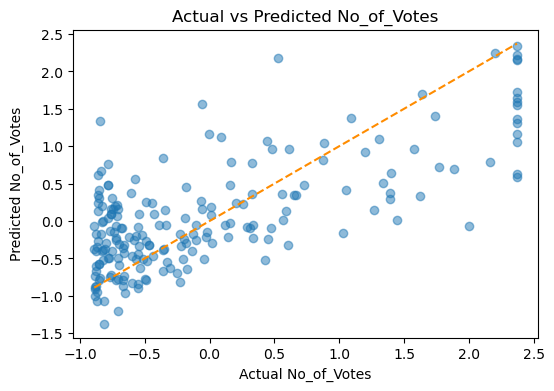

In [27]:
# Implement the Linear Regression model on our data

# Initialize and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='darkorange', linestyle='--')
plt.xlabel('Actual No_of_Votes')
plt.ylabel('Predicted No_of_Votes')
plt.title('Actual vs Predicted No_of_Votes')
plt.show()

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

## Decision Tree Regresion
- This model splits the data into branches based on feature values, like a flowchart.
  
- It breaks the dataset into smaller and smaller subsets while forming a tree structure.
  
- Each leaf node represents a predicted value (usually the mean of the target values in that group).
  
- It chooses splits by minimizing the variance (or MSE) in each subset.
  
This method is used when:
- The data is non-linear or has complex patterns.
- You want something easy to interpret.

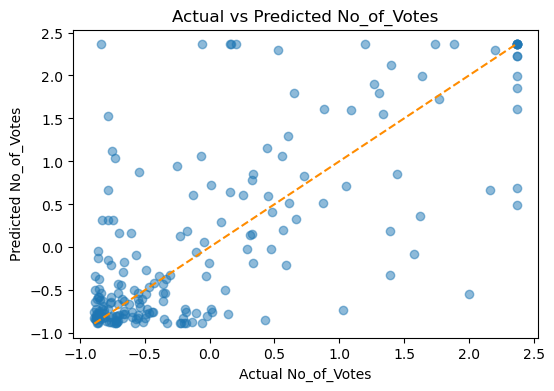

In [28]:
# Implement the Decision Tree Regression model on our data

# Initialize and train the model
dt = DecisionTreeRegressor(random_state=28)
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='darkorange', linestyle='--')
plt.xlabel('Actual No_of_Votes')
plt.ylabel('Predicted No_of_Votes')
plt.title('Actual vs Predicted No_of_Votes')
plt.show()

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

## Random Forest Regression
- Random Forest is an ensemble of many decision trees.
  
- Each tree is trained on a random subset of the data and features.
  
- The final prediction is the average of all the trees' predictions.
  
- It reduces overfitting, which is a common issue with a single decision tree.

- Uses bagging (Bootstrap Aggregating) to improve stability and accuracy.
  
This method is used when:
- You need high accuracy and can afford more computation.
- The data is complex and non-linear.

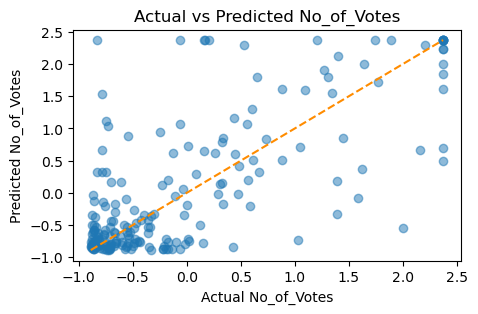

In [29]:
# Implement the Random Forest Regression model on our data

# Initialize and train the model
rf = RandomForestRegressor(n_estimators=50, random_state=28)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='darkorange', linestyle='--')
plt.xlabel('Actual No_of_Votes')
plt.ylabel('Predicted No_of_Votes')
plt.title('Actual vs Predicted No_of_Votes')
plt.show()

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

### Analyse hyperparemeter: n_estimators
In the Random Forest Regression Model, the hyperparameter n_estimators represents the number of trees in the forest.
  
It can influence the performance of the algorithm. I will analyze it accordingly.

In [16]:
# Compare estimators for Random Forest Regression models with different n_estimators values

def compare_rf_n_estimators(X_train, y_train, X_test, y_test, n_estimators_list):
    results = {}
    
    # Loop over each value of n_estimators
    for n in n_estimators_list:
        # Initialize and train the Random Forest model
        rf = RandomForestRegressor(n_estimators=n, random_state=28)
        rf.fit(X_train, y_train)
        
        # Make predictions
        y_pred_rf = rf.predict(X_test)
        
        # Calculate evaluation metrics
        mse_rf = mean_squared_error(y_test, y_pred_rf)
        r2_rf = r2_score(y_test, y_pred_rf)
        
        # Store the results in the dictionary
        results[n] = {'MSE': mse_rf, 'R²': r2_rf}
    
    # Return the results
    return results

# Example usage:
n_estimators_list = [5, 10, 50, 100, 150]  # List of n_estimators to compare
results = compare_rf_n_estimators(X_train, y_train, X_test, y_test, n_estimators_list)

# Print the results
for n, metrics in results.items():
    print(f"n_estimators = {n}: MSE = {metrics['MSE']}, R² = {metrics['R²']}")


n_estimators = 5: MSE = 0.41518373322161994, R² = 0.566212975999905
n_estimators = 10: MSE = 0.3700101055754296, R² = 0.6134107150535913
n_estimators = 50: MSE = 0.2855869058864667, R² = 0.7016166962115592
n_estimators = 100: MSE = 0.29431138595752, R² = 0.692501295141763
n_estimators = 150: MSE = 0.2903924172805666, R² = 0.6965958624947131


We find a significant increase in performance when increasing the number of estimators initially, but after n_estimators reaches a value around 50, the performance seems to reach a plateau.
  
This suggests that a good value for the hyperparameter considered is 50, in order to ensure both performance and lower computational cost.

## Evaluating the regression models
I used two metrics of evaluation:
  
- **Mean Squared Error** (MSE): this measures the average of the squared differences between predicted and actual values.
  
- **R-squared** / Coefficient of Determination: this measures how well the model explains the variance in the target variable. It’s a goodness-of-fit measure.
  
In general, a model is better performing if it has a *lower MSE*, and a *higher R-squared* value.

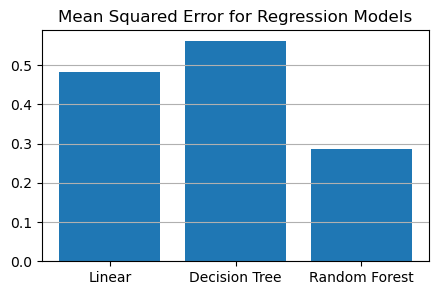

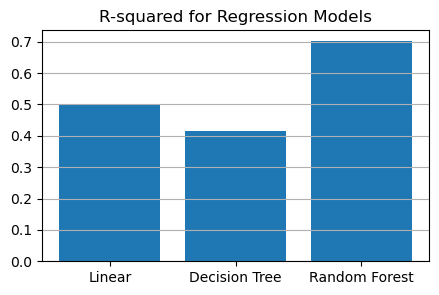

In [34]:
# Plot the errors

regression_types = ["Linear", "Decision Tree", "Random Forest"]

# Plot the Mean Squared Errors for the trained Regression models
mse_values = [mse_lr, mse_dt, mse_rf]
plt.figure(figsize=(5, 3))
plt.bar(regression_types, mse_values)
plt.title("Mean Squared Error for Regression Models")
plt.grid(axis='y')
plt.show()

# Plot the R-squared for the trained Regression models
r2_values = [r2_lr, r2_dt, r2_rf]
plt.figure(figsize=(5, 3))
plt.bar(regression_types, r2_values)
plt.title("R-squared for Regression Models")
plt.grid(axis='y')
plt.show()

# Model Interpretation & Insights
- Analyze which model performed best and why.
- Interpret feature importance (for tree-based models) and discuss how different features influence the predictions.
- Suggest potential improvements (e.g., handling non-linearity, feature transformations, or model selection changes).


## Findings
By analysing the data we deduce the following:
- The tree models give good estimates for the target variable (No_of_Votes), with varying precision.
- The **best performing model** (having both lowest mean squared error and highest r squared score) is the **Random Forest Regression** model.
- The **worst performing model** out of the three is the **Decision Tree Regression** model. 

## Feature importance:

In [36]:
# Extract feature importances for the Random Forest Regression

feature_columns = ['Released_Year', 'IMDB_Rating', 'Gross', 'Drama_Adventure_Animation']
X_train_df = pd.DataFrame(X_train, columns=feature_columns)
X_test_df = pd.DataFrame(X_test, columns=feature_columns)

importances = rf.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)


                     Feature  Importance
2                      Gross    0.453146
0              Released_Year    0.240002
1                IMDB_Rating    0.221795
3  Drama_Adventure_Animation    0.085058


### Interpretation
The selected features influence the target variable with different levels of importance. Ranked from most to least important, we can see:
1. **Gross**: Successful movies have a level of popularity which directly impact the community engagement in terms of number of votes.  
2. **IMDB Rating**: Better movies tend to be sought after by viewers, in turn attracting new votes.  
3. **Released Year**: Newer movies typically have more votes as IMDB's number of users has grown over time.  
4. Genres including **Drama, Adventure or Animation** (negative correlation): Movies belonging to these genres might be a little niche for the average viewer, attracting fewer number of votes than movies belonging to other genres.  

## Potential improvements:
In terms of **hyperparameter tuning**, we might find improvements in the case of Tree Regression Algorithms by considering the following:
- Optimize max_depth
- Adjust min_samples_split and min_samples_leaf  
  
In terms of **Feature Engineering**, we might find improvements by reconsidering some of the following:
- Removing or replacing low importance features, such as Drama_Adventure_Animation in my trained model.
- Creating new features by aggregation and using them for training. (e.g. Gross x Rating)

# Bonus challenge
- Implement Cross-Validation to ensure model robustness.
- Use ensemble techniques (e.g., averaging multiple models) to improve prediction accuracy.

## Cross validation
- Cross-validation is a method that involves dividing the dataset into multiple subsets, training the model on some of those subsets, and testing it on the remaining subsets.
  
- This process helps to get a better estimate of how the model will perform on different data, thus reducing the risk of overfitting or underfitting.
  
Below I have an implementation of a **K-fold Cross-Validation** algorithm.

In [41]:
models = {
  "Linear Regression": LinearRegression(),
  "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=28),
  "Random Forest": RandomForestRegressor(n_estimators=50, max_depth=10, random_state=28)
}

# 10-fold cross-validation
for name, model in models.items():
  pipeline = make_pipeline(StandardScaler(), model)
  scores = cross_val_score(pipeline, df[['Released_Year', 'IMDB_Rating', 'Gross', 'Drama_Adventure_Animation']], df['No_of_Votes'], cv=10, scoring='neg_mean_squared_error')
  mse_scores = -scores # adjust negative MSE in scikit-learn
  print(f"{name} MSE: mean = {mse_scores.mean():.2f}, standard deviation = {mse_scores.std():.2f}")

Linear Regression MSE: mean = 0.53, standard deviation = 0.37
Decision Tree MSE: mean = 0.68, standard deviation = 0.57
Random Forest MSE: mean = 0.42, standard deviation = 0.32


We find that by using K-Fold Cross Validation, the errors of the algorithm tend to increase slightly. We also find a decently high value of standard deviation. What this represents: 
  
- Without cross-validation, the model might look like it performs better because it is only evaluated on a single test set and can overfit that test set.
  
- With cross-validation, the model is evaluated on multiple folds, which gives a more realistic picture of its generalization ability.

## Ensemble techniques
- Ensemble techniques are methods where multiple models are combined to improve the overall performance of the prediction model.
  
- The idea behind ensemble methods is that by combining the predictions of several models, you can often achieve better performance (e.g., higher accuracy, lower bias/variance) than using a single model on its own.
  
Below I have an implementation of a **Blended Ensemble**, which combines the three Regression models previosuly trained and assigns weights (importance) to each of them based on previous performance.

In [43]:
linear = LinearRegression()
tree = DecisionTreeRegressor(max_depth=10, random_state=28)
rf = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=28)

# Train individual models
linear.fit(X_train, y_train)
tree.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Get predictions
pred_linear = linear.predict(X_test)
pred_tree = tree.predict(X_test)
pred_rf = rf.predict(X_test)

# Blend with weights
blended_pred = 0.3 * pred_linear + 0.2 * pred_tree + 0.5 * pred_rf

# Evaluate
mse = mean_squared_error(y_test, blended_pred)
r2 = r2_score(y_test, blended_pred)

print(f"Blended Ensemble - MSE: {mse:.2f}, R-squared: {r2:.2f}")

Blended Ensemble - MSE: 0.30, R-squared: 0.69


The model seems to be performing very well, achieving better results than the Linear and Decision Tree Regression models alone.